In [1]:
#Sentimental Analysis

In [2]:
#Data Loading

import numpy as np
import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()
print(df.shape)
df.sample()['clean_comment'].values
df.info()
df.isnull().sum()
# df[df['clean_comment'].isna()]
df.dropna(inplace=True) # clean the NAs
df.duplicated().sum() # check duplicated data
df.drop_duplicates(inplace=True)
#df[df['clean_comment'].str.strip()=='')] check empty comments
df=df[df['clean_comment'].str.strip()!='']
df['clean_comment']=df['clean_comment'].str.lower().str.strip() # clean up data
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

# urls
url_pattern=r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-zA-Z][0-0a-zA-Z]))+'
comments_with_urls=df[df['clean_comment'].str.contains(url_pattern,regex=True)]
comments_with_urls.head()

# new line char
comments_with_nl=df[df['clean_comment'].str.contains('\n')]
comments_with_nl.head()
df['clean_comment']=df['clean_comment'].str.replace('\n',' ',regex=True)




(37249, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

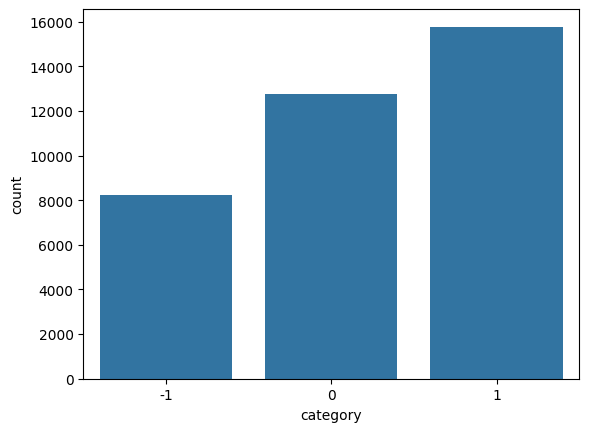

In [3]:
#EDA

import seaborn as sns
import matplotlib.pyplot as plt

# dist of classes
sns.countplot(data=df,x="category") # 1,0,-1 for positive, neutral and negative feedbacks
df['category'].value_counts(normalize=True).mul(100).round(2)
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))
df.sample(5)
df['word_count'].describe()


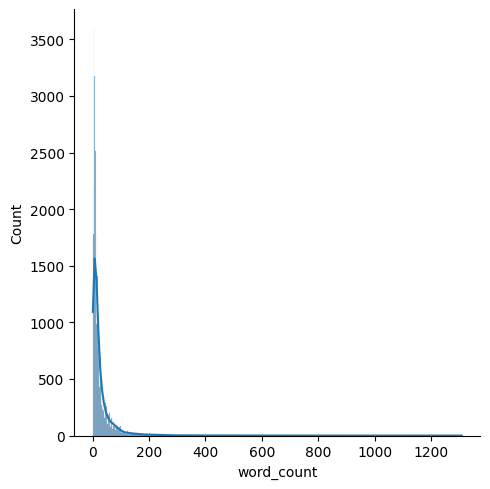

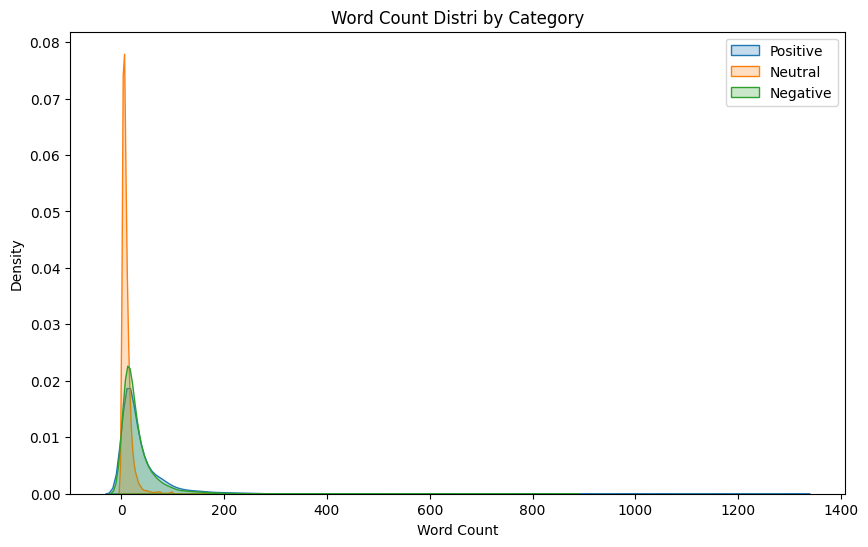

In [4]:
sns.displot(df['word_count'],kde=True) # distribution plot

plt.figure(figsize=(10,6))
sns.kdeplot(df[df['category']==1]['word_count'],label='Positive',fill=True)
sns.kdeplot(df[df['category']==0]['word_count'],label='Neutral',fill=True)
sns.kdeplot(df[df['category']==-1]['word_count'],label='Negative',fill=True)
plt.title('Word Count Distri by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()

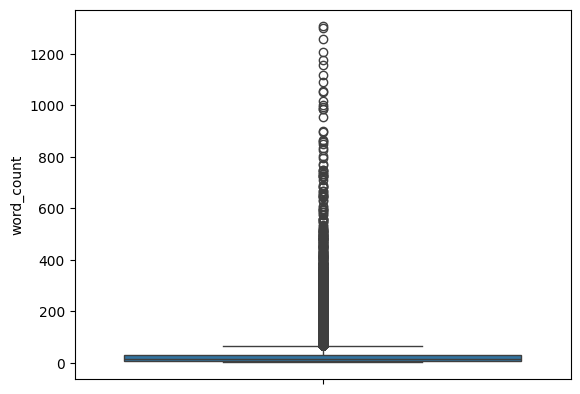

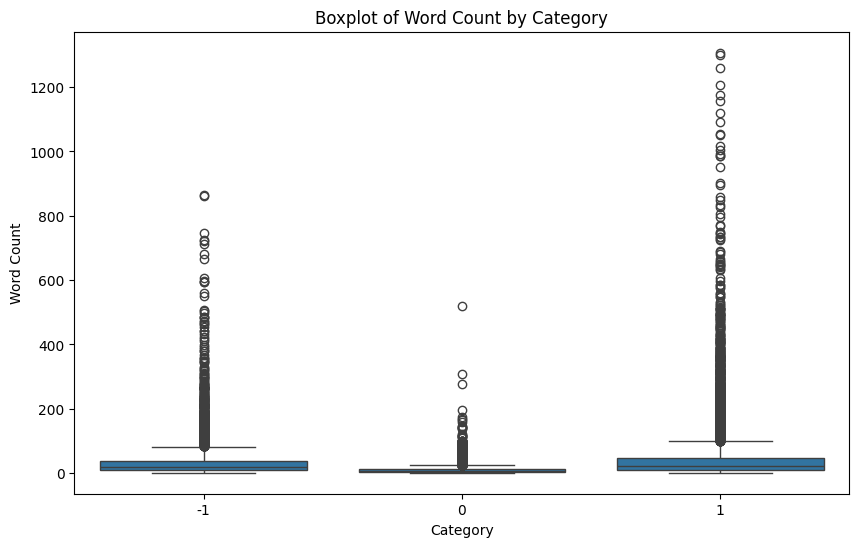

In [5]:
sns.boxplot(df['word_count'])

plt.figure(figsize=(10,6))
sns.boxplot(df,x='category',y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

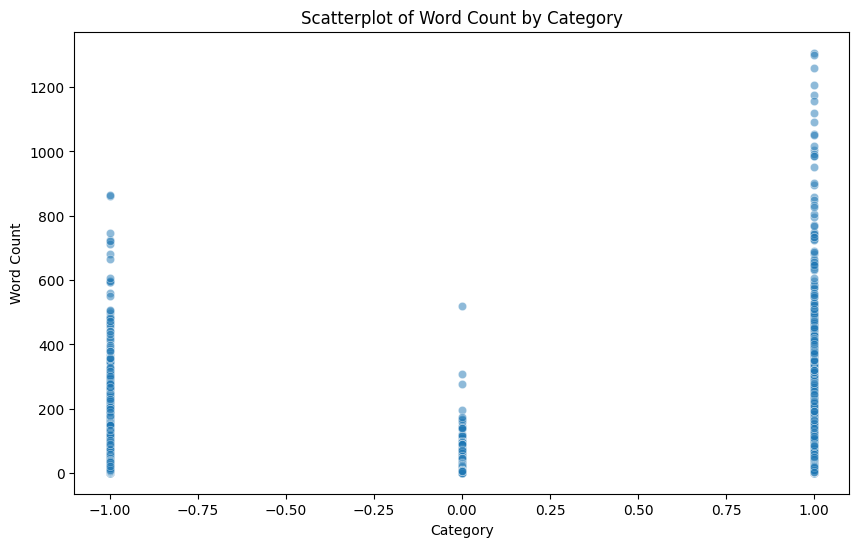

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='category',y='word_count',alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

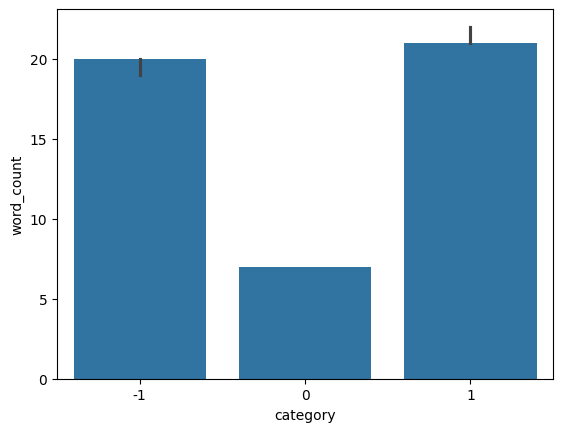

In [7]:
sns.barplot(df,x='category',y='word_count',estimator='median')

In [8]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
df['num_stop_words']=df['clean_comment'].apply(lambda x:len([word for word in x.split() if word in stop_words]))
df.sample(5)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,clean_comment,category,word_count,num_stop_words
14231,hug too daddy,0,3,1
24426,have much expectations such disappointment now...,-1,75,22
27699,bakchodi leaking,0,2,0
20949,before hillary lost bill clinton michael moore...,1,139,52
36901,hey can you provide the links the first parts ...,1,17,5


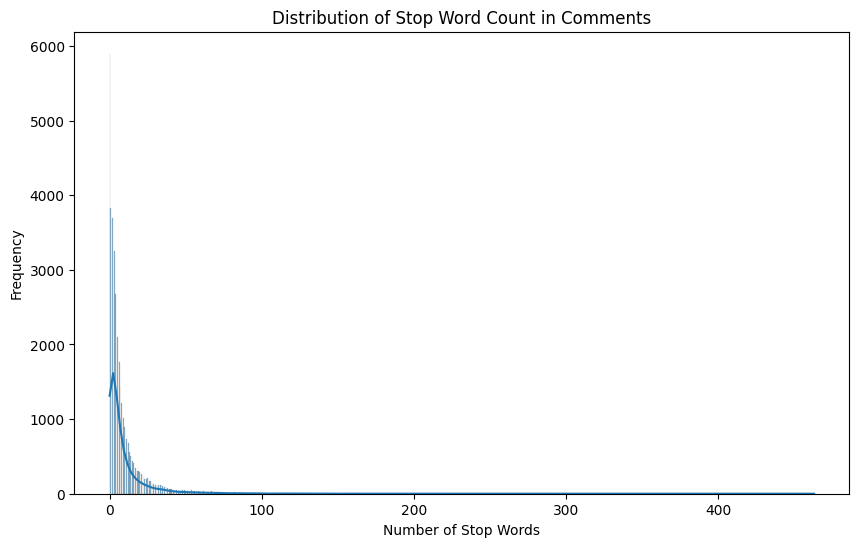

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['num_stop_words'],kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()


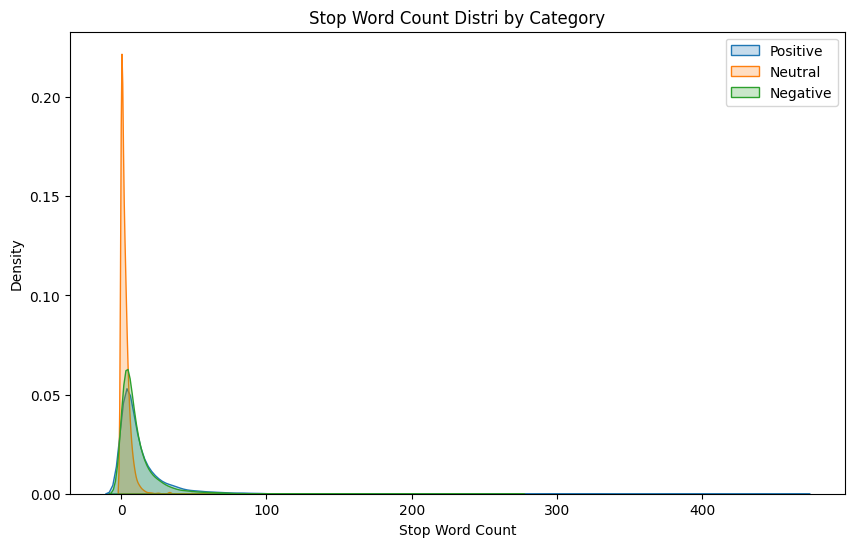

In [11]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['category']==1]['num_stop_words'],label='Positive',fill=True)
sns.kdeplot(df[df['category']==0]['num_stop_words'],label='Neutral',fill=True)
sns.kdeplot(df[df['category']==-1]['num_stop_words'],label='Negative',fill=True)
plt.title('Stop Word Count Distri by Category')
plt.xlabel('Stop Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

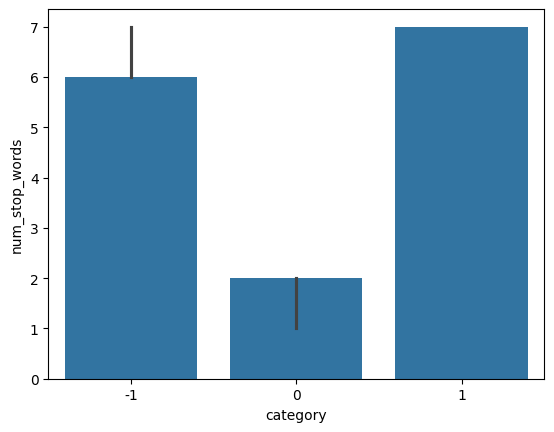

In [12]:
sns.barplot(df,x='category',y='num_stop_words',estimator='median')

C:\Users\hli\AppData\Local\Temp\ipykernel_60812\200019556.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df,x='count',y='stop_word',palette='viridis')


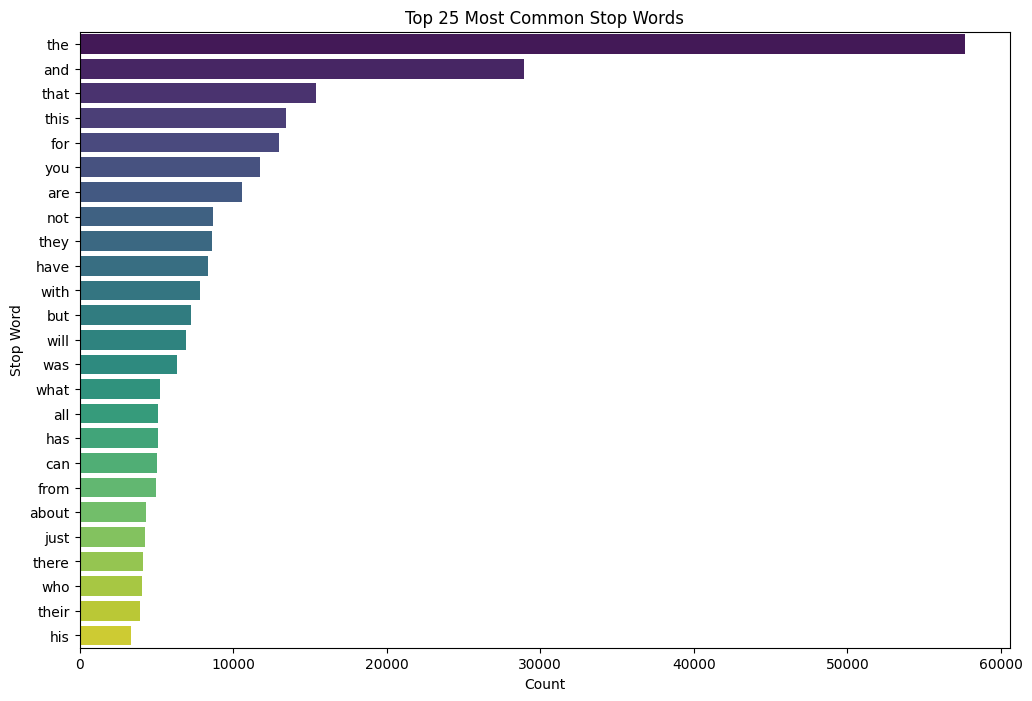

In [13]:
from collections import Counter
all_stop_words=[word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]
most_common_stop_words=Counter(all_stop_words).most_common(25)
top_25_df=pd.DataFrame(most_common_stop_words,columns=['stop_word','count'])
plt.figure(figsize=(12,8))
sns.barplot(data=top_25_df,x='count',y='stop_word',palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()



In [14]:
df['num_chars']=df['clean_comment'].apply(len)
df['num_chars'].describe()
all_text=' '.join(df['clean_comment'])
char_frequency=Counter(all_text)
char_frequency_df=pd.DataFrame(char_frequency.items(),columns=['character','freq']).sort_values(by='freq',ascending=True)

In [15]:
char_frequency_df['character'].values
char_frequency_df.tail(10)

,character,freq
10,h,296748
8,r,331425
17,s,355279
7,o,379908
9,n,388465
3,i,401388
1,a,481134
13,t,491287
12,e,666610
6,,1091592


In [16]:
# punctuations
df['num_punc_chars']=df['clean_comment'].apply(
    lambda x:sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
    )
df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punc_chars
9178,fuck have around 50k home 500s and 1000s thank...,-1,45,13,249,0
2833,surprised how few people studied supply chain ...,-1,17,7,106,0
27640,according the buddha chant namo amitabha buddh...,0,13,2,88,0
31198,that question reference mustache general narbh...,1,7,1,62,0
27240,well that just messed,0,4,2,21,0


C:\Users\hli\AppData\Local\Temp\ipykernel_60812\959985713.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df,x='count',y='bigram',palette='magma')


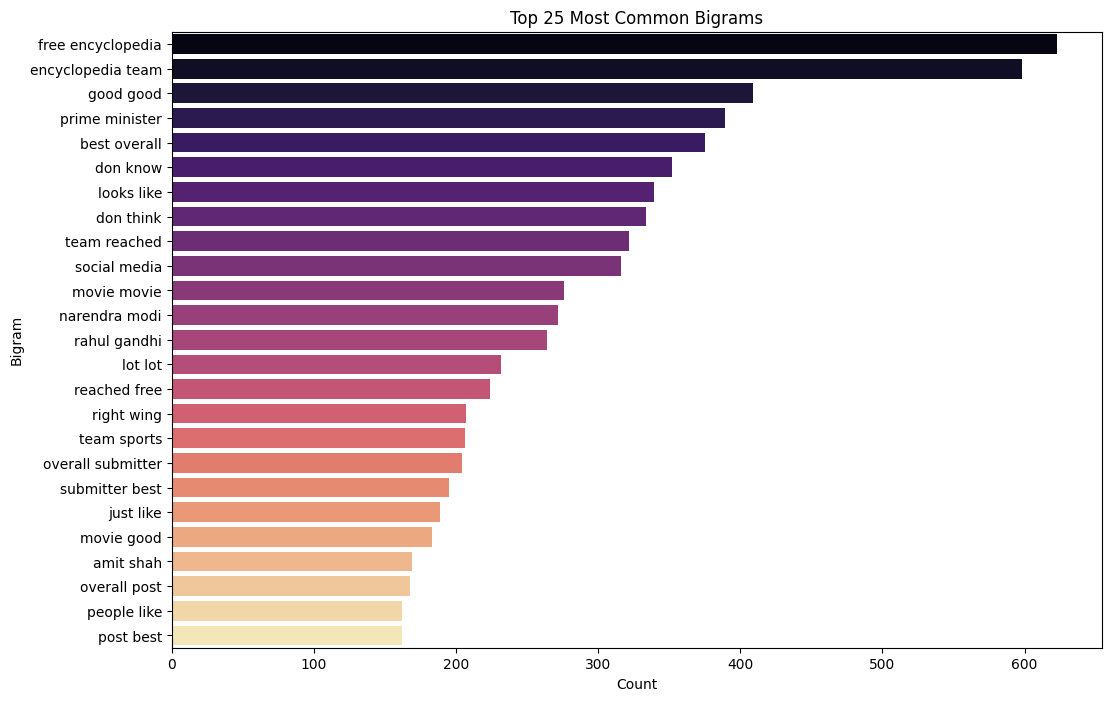

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# create a function to extract the top 25 bigrams
def get_top_ngrams(corpus,n=None):
    vec=CountVectorizer(ngram_range=(2,2),stop_words='english').fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)
    return words_freq[:n]
top_25_bigrams=get_top_ngrams(df['clean_comment'],25)
top_25_bigrams_df=pd.DataFrame(top_25_bigrams,columns=['bigram','count'])
plt.figure(figsize=(12,8))
sns.barplot(data=top_25_bigrams_df,x='count',y='bigram',palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()
    

C:\Users\hli\AppData\Local\Temp\ipykernel_60812\2509890988.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df,x='count',y='trigram',palette='coolwarm')


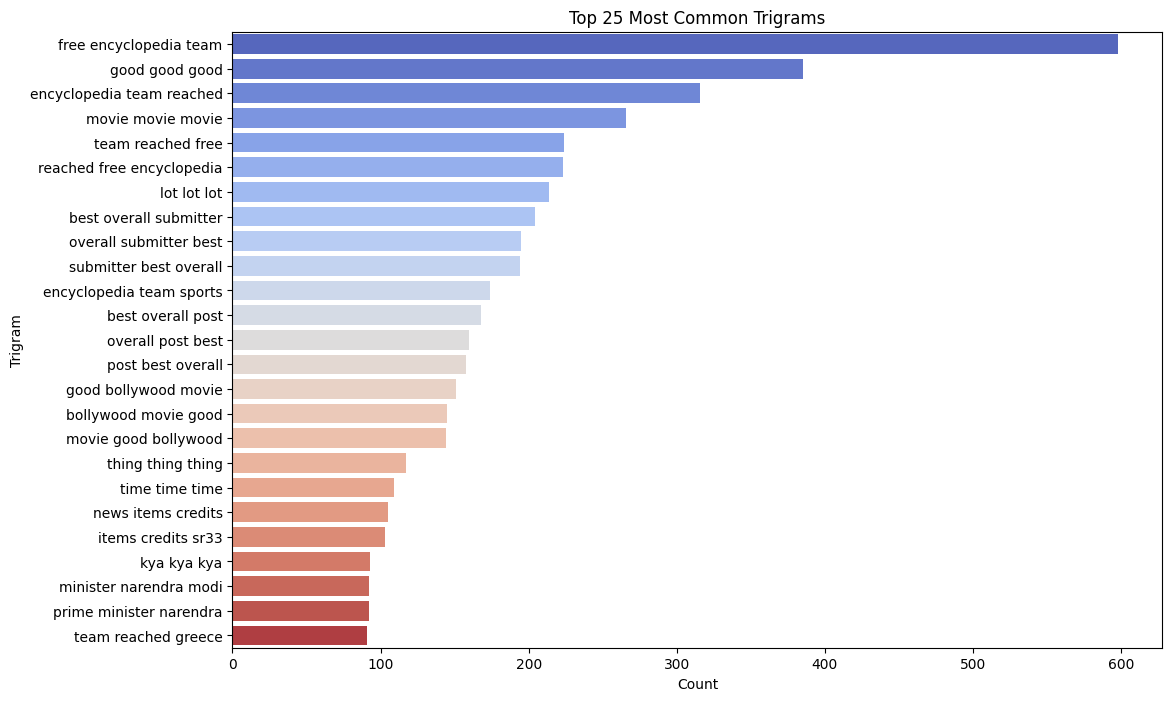

In [18]:
# create a function to extract the top 25 trigrams
def get_top_ngrams(corpus,n=None):
    vec=CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)
    return words_freq[:n]
top_25_trigrams=get_top_ngrams(df['clean_comment'],25)
top_25_trigrams_df=pd.DataFrame(top_25_trigrams,columns=['trigram','count'])
plt.figure(figsize=(12,8))
sns.barplot(data=top_25_trigrams_df,x='count',y='trigram',palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [19]:
# remove non-english characters from the comments and only keep standard English letter, digits and common punctuations
import re
df['clean_comment']=df['clean_comment'].apply(lambda x:re.sub(r'[^A-za-z0-9\s!?,.]','',str(x)))
all_text=' '.join(df['clean_comment'])
char_frequency=Counter(all_text)
char_fre_df=pd.DataFrame(char_frequency.items(),columns=['character','frequency']).sort_values(by='frequency',ascending=True)

In [20]:
from nltk.corpus import stopwords
# remove some stopwords
stop_words=set(stopwords.words('english'))-{'not','but','however','no','yet'}
df['clean_comment']=df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punc_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [21]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()
df['clean_comment']=df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_chars,num_punc_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


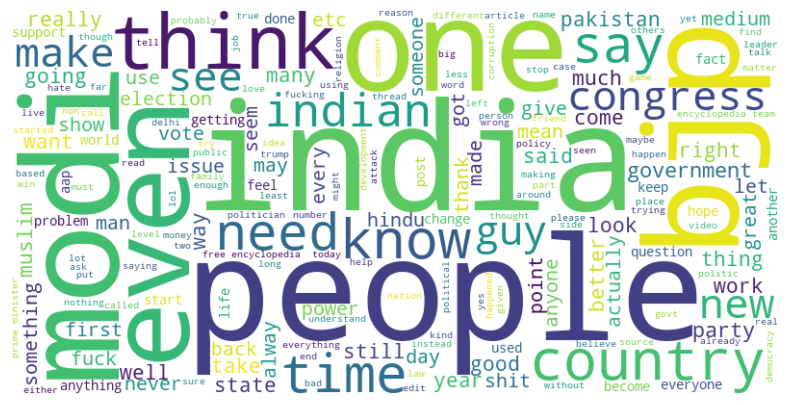

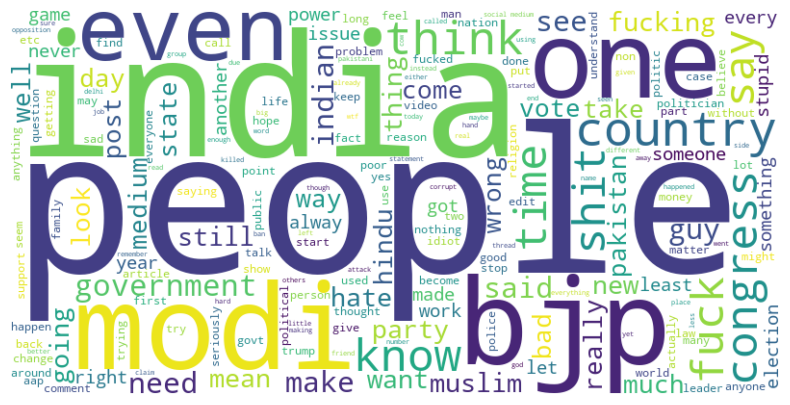

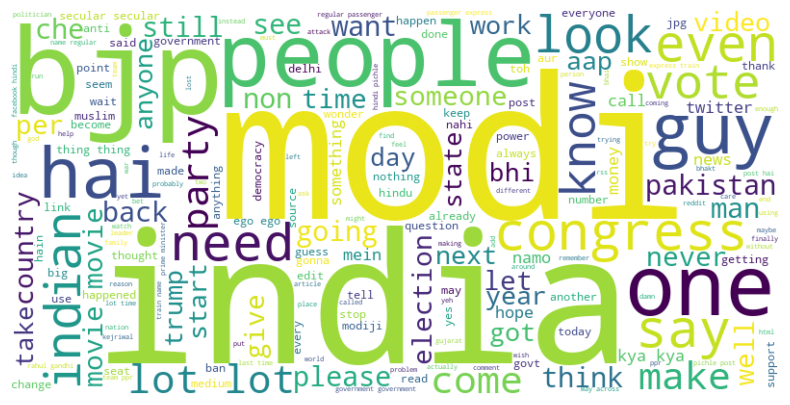

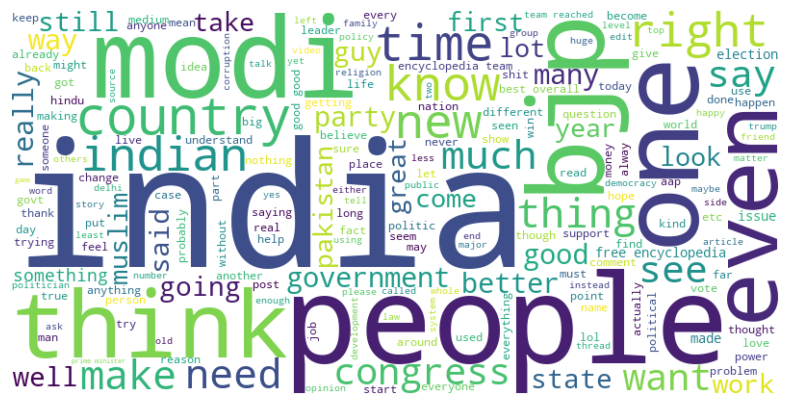

In [22]:
from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud=WordCloud(width=800,height=400,background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()
plot_word_cloud(df['clean_comment'])
for i in range(-1,2,1):
    plot_word_cloud(df[df['category']==i]['clean_comment'])

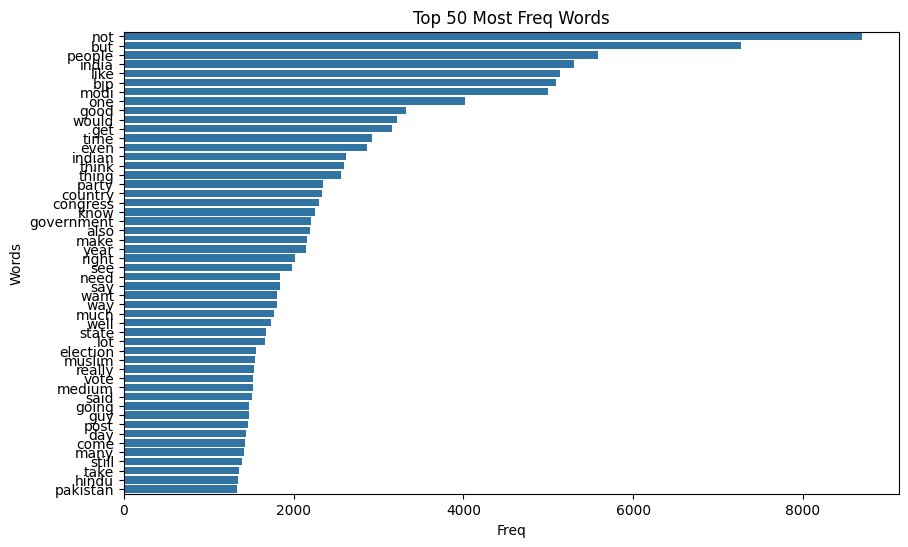

In [23]:
def plot_top_n_words(df,n=20):
    """Plot the top N most freq words in the ds"""
    words=' '.join(df['clean_comment']).split()
    counter=Counter(words)
    most_common_words=counter.most_common(n)
    words,counts=zip(*most_common_words)
    plt.figure(figsize=(10,6))
    sns.barplot(x=list(counts),y=list(words))
    plt.title(f'Top {n} Most Freq Words')
    plt.xlabel('Freq')
    plt.ylabel('Words')
    plt.show()

plot_top_n_words(df,n=50)

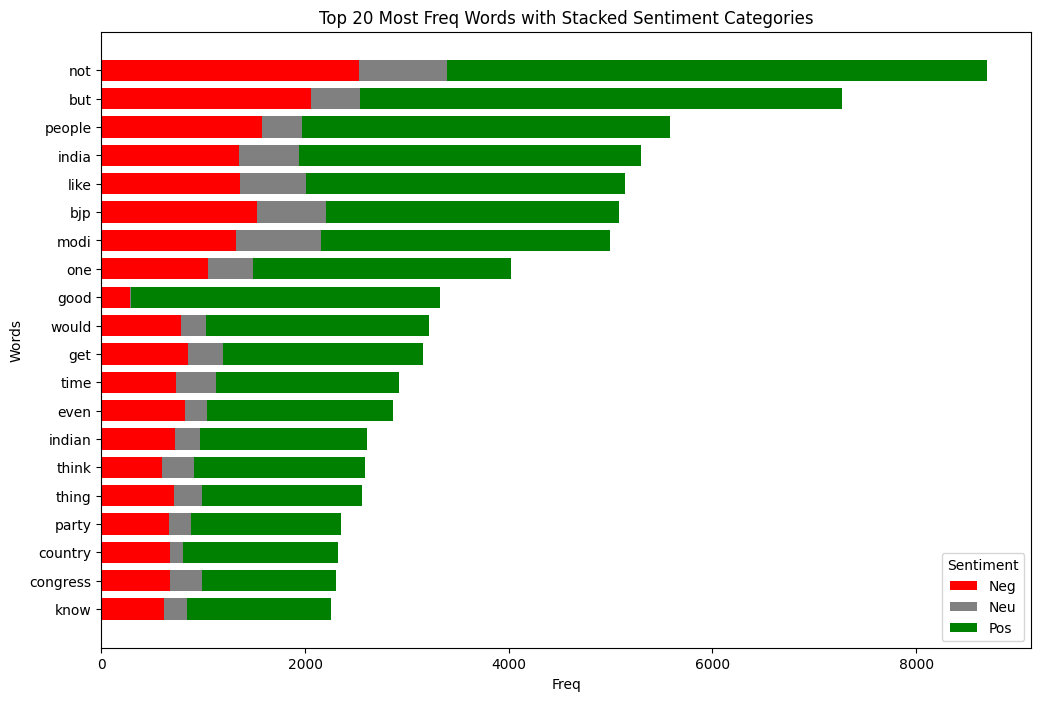

In [24]:
def plot_top_n_words_by_category(df,n=20,start=0):
    """Plot the top N most freq words in the ds by category"""
    word_cat_counts={}
    for i,row in df.iterrows():
        words=row['clean_comment'].split()
        category=row['category']
        for w in words:
            if w not in word_cat_counts:
                word_cat_counts[w]={-1:0,0:0,1:0}
            word_cat_counts[w][category]+=1
    total_word_counts={word:sum(counts.values()) for word, counts in word_cat_counts.items()}
    most_common_words=sorted(total_word_counts.items(),key=lambda x:x[1],reverse=True)[start:start+n]
    top_words=[word for word,_ in most_common_words]
    word_labels=top_words
    neg_counts=[word_cat_counts[w][-1] for w in top_words]
    neu_counts=[word_cat_counts[w][0] for w in top_words]
    pos_counts=[word_cat_counts[w][1] for w in top_words]
    plt.figure(figsize=(12,8))
    bar_width=0.75
    plt.barh(word_labels,neg_counts,color='red',label='Neg',height=bar_width)
    plt.barh(word_labels,neu_counts,left=neg_counts,color='gray',label='Neu',height=bar_width)
    plt.barh(word_labels,pos_counts,left=[i+j for i,j in zip(neg_counts,neu_counts)],color='green',label='Pos',height=bar_width)
    plt.xlabel('Freq')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Freq Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment',loc='lower right')
    plt.gca().invert_yaxis()
    plt.show()
    
plot_top_n_words_by_category(df)

In [25]:
# ML Flow

In [44]:
import mlflow

# test
mlflow.set_tracking_uri("http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/")
with mlflow.start_run():
    mlflow.log_param("param1",15)
    mlflow.log_metric("metric1",0.89)

🏃 View run bouncy-stoat-101 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/321415355380118176/runs/f38c7f65eb0b4f609c1a9d147743b1a0
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/321415355380118176


In [27]:
# create baseline model
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')

stop_words=set(stopwords.words('english'))-{'not','but','however','no','yet'}
lemmatizer=WordNetLemmatizer()
def preprocessing_comment(comment,stop_words=stop_words,lemmatizer=lemmatizer):
    if not isinstance(comment, str):
        comment = ""
    comment=comment.lower().strip()
    comment=re.sub(r'\n',' ',comment)
    comment=re.sub(r'[^A-Za-z0-9\s!?.,]','',comment)
    comment=' '.join([lemmatizer.lemmatize(w) for w in comment.split() if w not in stop_words])
    return comment
df['clean_comment']=df['clean_comment'].apply(preprocessing_comment)
df.head(3)

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1


In [30]:
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,cross_val_predict,StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# step 1 - vectorize the comments using bag of words (CountVectorizer)
vectorizer=CountVectorizer(max_features=10000)
X=vectorizer.fit_transform(df['clean_comment']).toarray()
y=df['category']
X = X[:30, :]
y = y[:30]
print(X.shape,y.shape)

# set up MLFlow
mlflow.set_tracking_uri("http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/")
mlflow.set_experiment("RF Baseline")

(30, 10000) (30,)


<Experiment: artifact_location='s3://mlflow-bucket-fernando/173314304475805426', creation_time=1764685580773, experiment_id='173314304475805426', last_update_time=1764685580773, lifecycle_stage='active', name='RF Baseline', tags={'mlflow.experimentKind': 'custom_model_development'}>

train the model
finish training the model
finish generating the report


2025/12/02 10:30:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/02 10:30:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_Baseline_TrainTestSplit at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/173314304475805426/runs/47c84eb421dd401f949e7805f21ddfd4
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/173314304475805426
Acc 0.5


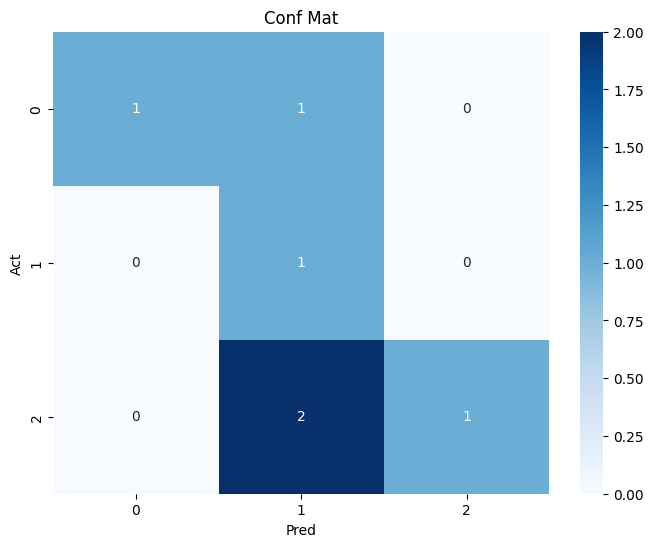

In [34]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
# Define and train a random forest baseline model using a simple train-test split
with mlflow.start_run() as run:
    # log a description for the run
    mlflow.set_tag("mlflow.runName","RandomForest_Baseline_TrainTestSplit")
    mlflow.set_tag("experiment_type","baseline")
    mlflow.set_tag("model_type","RandomForestClassifier")
    # add a description
    mlflow.set_tag("description","Baseline RandomForest model for sentiment analysis using BoW")
    # log params for the vectorizer
    mlflow.log_param("vectorizer_type","CounterVectorizer")
    mlflow.log_param("vectorizer_max_features",vectorizer.max_features)
    # log random forest params
    n_estimators=200
    max_depth=15
    mlflow.log_param("n_estimators",n_estimators)
    mlflow.log_param("max_depth",max_depth)
    # init and train the model
    print("train the model")
    model=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=42)
    model.fit(X_train,y_train)
    print("finish training the model")
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    mlflow.log_metric("accuracy",accuracy)
    classification_rep=classification_report(y_test,y_pred,output_dict=True)
    print("finish generating the report")
    for label,metrics in classification_rep.items():
        if isinstance(metrics,dict):
            for metric,value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}",value)
    conf_matrix=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
    plt.xlabel("Pred")
    plt.ylabel("Act")
    plt.title("Conf Mat")
    plt.savefig("data/conf_mat.png")
    mlflow.log_artifact("conf_mat.png") # save and the log the confusion matrix plot
    mlflow.sklearn.log_model(model,"random_forest_model") # log model
    #df.to_csv("dataset.csv",index=False) # optionally to log the preprocessed dataset if it is small enough
    # test reading the csv
    #pd.read_csv("dataset.csv").head()
    #mlflow.log_artifact("dataset.csv")
print(f"Acc {accuracy}")

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.50      0.67         2
           0       0.25      1.00      0.40         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         6
   macro avg       0.75      0.61      0.52         6
weighted avg       0.88      0.50      0.54         6



In [43]:
# experiment 2 to see which n value to use and which mechanism to use
mlflow.set_tracking_uri("http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/")
mlflow.set_experiment("Exp 2 - BoW vs TfIdf")

from sklearn.feature_extraction.text import TfidfVectorizer
import os
df=pd.read_csv('dataset.csv').dropna(subset=['clean_comment'])
df.shape

# func to run the experiment
def run_experiment(vectorizer_type,ngram_range,vectorizer_max_features,vectorizer_name):
    # vectorization
    if vectorizer_type=="BoW":
        vectorizer=CountVectorizer(ngram_range=ngram_range,max_features=vectorizer_max_features)
    else:
        vectorizer=TfidfVectorizer(ngram_range=ngram_range,max_features=vectorizer_max_features)
    df_subset = df.iloc[:30]
    X_train,X_test,y_train,y_test=train_test_split(df_subset['clean_comment'],df_subset['category'],test_size=0.2,random_state=42)
    X_train=vectorizer.fit_transform(X_train)
    X_test=vectorizer.transform(X_test)
    # define and train a random forest model
    with mlflow.start_run() as run:
        mlflow.set_tag("mlflow.runName",f"{vectorizer_name}_{ngram_range}_RandomForest")
        mlflow.set_tag("experiment_type","feature_engineering")
        mlflow.set_tag("model_type","RandomForestClassifier")
        # add a description
        mlflow.set_tag("description",f"RandomForest with {vectorizer_name}, ngram_range={ngram_range}")
        # log params for the vectorizer
        mlflow.log_param("vectorizer_type",vectorizer_type)
        mlflow.log_param("ngram_range",ngram_range)
        mlflow.log_param("vectorizer_max_features",vectorizer_max_features)
        # log random forest params
        n_estimators=200
        max_depth=15
        mlflow.log_param("n_estimators",n_estimators)
        mlflow.log_param("max_depth",max_depth)
        # init and train the model
        print("train the model")
        model=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=42)
        model.fit(X_train,y_train)
        print("finish training the model")
        y_pred=model.predict(X_test)
        accuracy=accuracy_score(y_test,y_pred)
        mlflow.log_metric("accuracy",accuracy)
        classification_rep=classification_report(y_test,y_pred,output_dict=True)
        print("finish generating the report")
        for label,metrics in classification_rep.items():
            if isinstance(metrics,dict):
                for metric,value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric}",value)
        conf_matrix=confusion_matrix(y_test,y_pred)
        plt.figure(figsize=(8,6))
        sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
        plt.xlabel("Pred")
        plt.ylabel("Act")
        plt.title("Conf Mat")
        plt.savefig("data/conf_mat.png")
        mlflow.log_artifact("conf_mat.png") # save and the log the confusion matrix plot
        plt.close()
        mlflow.sklearn.log_model(model,f"random_forest_{vectorizer_name}_{ngram_range}_model") 

# run experiments for bow and tf-idf with diff n-grams
ngram_ranges=[(1,1),(1,2),(1,3)]
max_features=5000
for ngram_range in ngram_ranges:
    run_experiment("BoW",ngram_range,max_features,vectorizer_name="Bow")
    run_experiment("TfIdf",ngram_range,max_features,vectorizer_name="TfIdf")

train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

🏃 View run Bow_(1, 1)_RandomForest at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/321415355380118176/runs/84fde813a9174ea69104086f666377e7
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/321415355380118176
train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

🏃 View run TfIdf_(1, 1)_RandomForest at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/321415355380118176/runs/2458db6758b64f14b97e39d7848f2b1d
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/321415355380118176
train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

🏃 View run Bow_(1, 2)_RandomForest at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/321415355380118176/runs/a8a81fa2d4c840c9bc10dd2473ad5a57
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/321415355380118176
train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

🏃 View run TfIdf_(1, 2)_RandomForest at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/321415355380118176/runs/af78d87c5a24427f8533611e8e47cf2c
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/321415355380118176
train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

🏃 View run Bow_(1, 3)_RandomForest at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/321415355380118176/runs/548db5e7f1ed41cfa29ed35f7f4b7bf4
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/321415355380118176
train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

🏃 View run TfIdf_(1, 3)_RandomForest at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/321415355380118176/runs/c22919d20433404bb827991d617634f0
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/321415355380118176


In [46]:
# experiment 3 - how many max features (from experiment 2, we have chosen trigram and tfidf)
mlflow.set_tracking_uri("http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/")
mlflow.set_experiment("Exp 3 - TfIdf Trigram with Diff Max Features")


df=pd.read_csv('dataset.csv').dropna(subset=['clean_comment'])
# func to run the experiment
def run_experiment3(max_features):
    ngram_range=(1,3)
    vectorizer=TfidfVectorizer(ngram_range=ngram_range,max_features=max_features)
    df_subset = df.iloc[:30]
    X_train,X_test,y_train,y_test=train_test_split(df_subset['clean_comment'],df_subset['category'],test_size=0.2,random_state=42)
    X_train=vectorizer.fit_transform(X_train)
    X_test=vectorizer.transform(X_test)
    # define and train a random forest model
    with mlflow.start_run() as run:
        mlflow.set_tag("mlflow.runName",f"TFIDF_Trigrams_max_features={max_features}")
        mlflow.set_tag("experiment_type","feature_engineering")
        mlflow.set_tag("model_type","RandomForestClassifier")
        # add a description
        mlflow.set_tag("description",f"RandomForest with TFIDF_Trigrams_max_features={max_features}")
        # log params for the vectorizer
        mlflow.log_param("vectorizer_type","TF-IDF")
        mlflow.log_param("ngram_range",ngram_range)
        mlflow.log_param("vectorizer_max_features",max_features)
        # log random forest params
        n_estimators=200
        max_depth=15
        mlflow.log_param("n_estimators",n_estimators)
        mlflow.log_param("max_depth",max_depth)
        # init and train the model
        print("train the model")
        model=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=42)
        model.fit(X_train,y_train)
        print("finish training the model")
        y_pred=model.predict(X_test)
        accuracy=accuracy_score(y_test,y_pred)
        mlflow.log_metric("accuracy",accuracy)
        classification_rep=classification_report(y_test,y_pred,output_dict=True)
        print("finish generating the report")
        for label,metrics in classification_rep.items():
            if isinstance(metrics,dict):
                for metric,value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric}",value)
        conf_matrix=confusion_matrix(y_test,y_pred)
        plt.figure(figsize=(8,6))
        sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
        plt.xlabel("Pred")
        plt.ylabel("Act")
        plt.title("Conf Mat")
        plt.savefig("data/conf_mat.png")
        mlflow.log_artifact("conf_mat.png") # save and the log the confusion matrix plot
        plt.close()
        mlflow.sklearn.log_model(model,f"random_forest_tfidf_trigrams_{max_features}_model") 

# run experiments for bow and tf-idf with diff n-grams
max_feautures_ranges=[i for i in range(1000,11000,1000)]

for max_feature in max_feautures_ranges:
    run_experiment3(max_feature)


train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

🏃 View run TFIDF_Trigrams_max_features=1000 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792/runs/54574924006a45d38ebc2c411910f6ba
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792
train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

🏃 View run TFIDF_Trigrams_max_features=2000 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792/runs/a5a7e5a5e33146a5828e802345467be1
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792
train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

🏃 View run TFIDF_Trigrams_max_features=3000 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792/runs/12ee73864dd746b0b9a23d83782f8962
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792
train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

🏃 View run TFIDF_Trigrams_max_features=4000 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792/runs/daa7a598973e447e84e643eec87d61f7
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792
train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

🏃 View run TFIDF_Trigrams_max_features=5000 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792/runs/71395d82c3ae4838ba55a4c0c64c92f2
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792
train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

🏃 View run TFIDF_Trigrams_max_features=6000 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792/runs/64f04aaf599842e99a2864a0250c16ce
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792
train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

🏃 View run TFIDF_Trigrams_max_features=7000 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792/runs/464222bc84114553b0cdbc13461363ff
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792
train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

🏃 View run TFIDF_Trigrams_max_features=8000 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792/runs/fb56d9f464614eeba78eda68dac132fc
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792
train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

🏃 View run TFIDF_Trigrams_max_features=9000 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792/runs/61539b7f00fc4e66b39a7a400052df3f
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792
train the model
finish training the model


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", re

finish generating the report


2025/12/02 14:19:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/02 14:19:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TFIDF_Trigrams_max_features=10000 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792/runs/383e20d48a72492fb1ed88fdce76536d
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/740114221389418792


In [49]:
# experiment 4 - handling imbalanced data
mlflow.set_tracking_uri("http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/")
mlflow.set_experiment("Exp 4 - Handling Imbalanced Data")

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN


df=pd.read_csv('dataset.csv').dropna(subset=['clean_comment'])
# func to run the experiment
def run_experiment4(imbalance_method):
    ngram_range=(1,3)
    max_features=10000
    vectorizer=TfidfVectorizer(ngram_range=ngram_range,max_features=max_features)
    df_subset = df.iloc[:150]
    X_train,X_test,y_train,y_test=train_test_split(df_subset['clean_comment'],df_subset['category'],test_size=0.2,random_state=42)
    X_train_vec=vectorizer.fit_transform(X_train)
    X_test_vec=vectorizer.transform(X_test)
    # handle class imbalance based on the selected method (only applied to the training set)
    if imbalance_method=='class_weights':
        class_weight='balanced' # use class_weight in Random Forest
    else:
        class_weight=None # do not apply class_weight if using resampling
        # resampling techniques (only applied to the training set)
        if imbalance_method=='oversampling':
            smote=SMOTE(random_state=42)
            X_train_vec,y_train=smote.fit_resample(X_train_vec,y_train)
        elif imbalance_method=='adasyn':
            adasyn=ADASYN(random_state=42)
            X_train_vec,y_train=adasyn.fit_resample(X_train_vec,y_train)
        elif imbalance_method=='undersampling':
            rus=RandomUnderSampler(random_state=42)
            X_train_vec,y_train=rus.fit_resample(X_train_vec,y_train)
        elif imbalance_method=='smote_enn':
            smote_enn=SMOTEENN(random_state=42)
            X_train_vec,y_train=smote_enn.fit_resample(X_train_vec,y_train)
    # define and traing a random forest model
    with mlflow.start_run() as run:
        mlflow.set_tag("mlflow.runName",f"Imbalance_{imbalance_method}_TFIDF_Trigrams_max_features={max_features}")
        mlflow.set_tag("experiment_type","feature_engineering")
        mlflow.set_tag("model_type","RandomForestClassifier")
        # add a description
        mlflow.set_tag("description",f"Imbalance={imbalance_method} RandomForest with TFIDF_Trigrams_max_features={max_features}")
        # log params for the vectorizer
        mlflow.log_param("vectorizer_type","TF-IDF")
        mlflow.log_param("ngram_range",ngram_range)
        mlflow.log_param("vectorizer_max_features",max_features)
        # log random forest params
        n_estimators=200
        max_depth=15
        mlflow.log_param("n_estimators",n_estimators)
        mlflow.log_param("max_depth",max_depth)
        # init and train the model
        print("train the model")
        model=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=42)
        model.fit(X_train_vec,y_train)
        print("finish training the model")
        y_pred=model.predict(X_test_vec)
        accuracy=accuracy_score(y_test,y_pred)
        mlflow.log_metric("accuracy",accuracy)
        classification_rep=classification_report(y_test,y_pred,output_dict=True)
        print("finish generating the report")
        for label,metrics in classification_rep.items():
            if isinstance(metrics,dict):
                for metric,value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric}",value)
        conf_matrix=confusion_matrix(y_test,y_pred)
        plt.figure(figsize=(8,6))
        sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
        plt.xlabel("Pred")
        plt.ylabel("Act")
        plt.title("Conf Mat")
        plt.savefig("data/conf_mat.png")
        mlflow.log_artifact("conf_mat.png") # save and the log the confusion matrix plot
        plt.close()
        mlflow.sklearn.log_model(model,f"random_forest_tfidf_trigrams_{max_features}_model") 

# run experiments for bow and tf-idf with diff n-grams
imbalance_methods=['class_weights','oversampling','adasyn','undersampling','smote_enn']
for imbalance_method in imbalance_methods:
    run_experiment4(imbalance_method)


train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

🏃 View run Imbalance_class_weights_TFIDF_Trigrams_max_features=10000 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/553257189350017893/runs/a2aff52bffa74c1c9f602624c4d09327
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/553257189350017893
train the model
finish training the model
finish generating the report


2025/12/02 14:55:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/02 14:56:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Imbalance_oversampling_TFIDF_Trigrams_max_features=10000 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/553257189350017893/runs/f4c4537c5798442b90aff37be73efb3a
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/553257189350017893
train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

🏃 View run Imbalance_adasyn_TFIDF_Trigrams_max_features=10000 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/553257189350017893/runs/d317cb8df9e0401ca239e7dfcbc85cb1
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/553257189350017893
train the model
finish training the model
finish generating the report


2025/12/02 14:56:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/02 14:56:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Imbalance_undersampling_TFIDF_Trigrams_max_features=10000 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/553257189350017893/runs/b86fd469116f4b2f85e7f7b3069bda97
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/553257189350017893
train the model
finish training the model
finish generating the report


C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hli\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

🏃 View run Imbalance_smote_enn_TFIDF_Trigrams_max_features=10000 at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/553257189350017893/runs/74e26e5190064e6d9bcc11501f8d55fd
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/553257189350017893


In [58]:
# experiment 5 - hyperparam tuning for XGBoost
mlflow.set_tracking_uri("http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/")
mlflow.set_experiment("Exp 5 - ML Algos with HP Tuning")

import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# remap the class labels from -1,0,1 to 2,0,1
df=pd.read_csv('dataset.csv').dropna(subset=['clean_comment'])
df = df.iloc[:360]
df['category']=df['category'].map({-1:2,0:0,1:1})
# remove rows where the target labels are NaN
df=df.dropna(subset=['category'])
ngram_range=(1,3)
max_features=1000
# train-test split before vectorization and resampling
X_train,X_test,y_train,y_test=train_test_split(df['clean_comment'],df['category'],test_size=0.2,random_state=42)
# vectorization using tf-idf, fit on training data only
vectorizer=TfidfVectorizer(ngram_range=ngram_range,max_features=max_features)
X_train_vec=vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)
smote=SMOTE(random_state=42)
X_train_vec,y_train=smote.fit_resample(X_train_vec,y_train)

# function to log results to MLFlow
def log_mlflow(model_name,model,X_train,X_test,y_train,y_test,best_params=None,Comment=None):
    with mlflow.start_run() as run:
        mlflow.set_tag("mlflow.runName",f"{model_name}_SMOTE_TFIDF_Trigrams")
        mlflow.set_tag("experiment_type","algorithm_comparison")
        mlflow.log_param("algo_name",model_name)
        # init and train the model
        print("train the model")
        model.fit(X_train,y_train)
        print("finish training the model")
        y_pred=model.predict(X_test)
        accuracy=accuracy_score(y_test,y_pred)
        mlflow.log_metric("accuracy",accuracy)
        classification_rep=classification_report(y_test,y_pred,output_dict=True)
        print("finish generating the report")
        for label,metrics in classification_rep.items():
            if isinstance(metrics,dict):
                for metric,value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric}",value)
        mlflow.sklearn.log_model(model,f"random_forest_tfidf_trigrams_{max_features}_model") 

# optuna objective function for XGBoost
def objective_xgboost(trial):
    n_estimators=trial.suggest_int('n_estimators',50,300)
    learning_rate=trial.suggest_float('learning_rate',1e-4,1e-1,log=True)
    max_depth=trial.suggest_int('max_depth',3,10)
    model=XGBClassifier(n_estimators=n_estimators,learning_rate=learning_rate,max_depth=max_depth,random_state=42)
    return accuracy_score(y_test,model.fit(X_train_vec,y_train).predict(X_test_vec))

# run optuna for XGBoost, log the best model only
def run_optuna_exp():
    study=optuna.create_study(direction="maximize")
    study.optimize(objective_xgboost,n_trials=30)
    # get the best params and log only the best model
    best_params=study.best_params
    best_model=XGBClassifier(n_estimators=best_params['n_estimators'],learning_rate=best_params['learning_rate'],
                             max_depth=best_params['max_depth'],random_state=42)
    log_mlflow("XGBoost",best_model,X_train_vec,X_test_vec,y_train,y_test)
    
run_optuna_exp()


[I 2025-12-02 15:24:04,561] A new study created in memory with name: no-name-7dd666a1-0000-4622-9afa-e73d32735c10
[I 2025-12-02 15:24:05,103] Trial 0 finished with value: 0.4722222222222222 and parameters: {'n_estimators': 65, 'learning_rate': 0.028626433881436233, 'max_depth': 5}. Best is trial 0 with value: 0.4722222222222222.
[I 2025-12-02 15:24:06,844] Trial 1 finished with value: 0.4722222222222222 and parameters: {'n_estimators': 118, 'learning_rate': 0.0013469447830108242, 'max_depth': 9}. Best is trial 0 with value: 0.4722222222222222.
[I 2025-12-02 15:24:08,419] Trial 2 finished with value: 0.4861111111111111 and parameters: {'n_estimators': 100, 'learning_rate': 0.0011600741488533486, 'max_depth': 10}. Best is trial 2 with value: 0.4861111111111111.
[I 2025-12-02 15:24:10,925] Trial 3 finished with value: 0.4444444444444444 and parameters: {'n_estimators': 289, 'learning_rate': 0.0007426102372290845, 'max_depth': 6}. Best is trial 2 with value: 0.4861111111111111.
[I 2025-12-

train the model
finish training the model
finish generating the report


2025/12/02 15:25:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/02 15:25:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoost_SMOTE_TFIDF_Trigrams at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/973952832117636987/runs/4c9bcb5558a9468dad860c05778c4c08
🧪 View experiment at: http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/#/experiments/973952832117636987


In [ ]:
# experiment 6 - tuning the hyperparams of another algorithm lightGBM
mlflow.set_tracking_uri("http://ec2-15-222-29-84.ca-central-1.compute.amazonaws.com:5000/")
mlflow.set_experiment("Exp 6 - LightBGM HP Tuning")

# we can use X_train_vec, X_test_vec, y_train and y_test from above
# optuna objective function for LightBGM
def objective_lightbgm(trial):
    n_estimators=trial.suggest_int('n_estimators',100,1000)
    learning_rate=trial.suggest_float('learning_rate',1e-4,1e-1,log=True)
    max_depth=trial.suggest_int('max_depth',3,15)
    num_leaves=trial.suggest_int('num_leaves',20,150)
    min_child_samples=trial.suggest_init('min_child_samples',10,100)
    colsample_bytree=trial.suggest_float('colsample_bytree',0.5,1.0)
    subsample=trial.suggest_float('subsample',0.5,1.0)
    reg_alpha=trial.suggest_float('reg_alpha',1e-4,10,log=True)
    reg_lambda=trial.suggest_float('reg_lambda',1e-4,10,log=True)
    params={
        'n_estimators':n_estimators,
        'learning_rate':learning_rate,
        'max_depth':max_depth,
        'num_leaves':num_leaves,
        'min_child_samples':min_child_samples,
        'colsample_bytree':colsample_bytree,
        'subsample':subsample,
        'reg_alpha':reg_alpha,
        'reg_lambda':reg_lambda
    }

    model=LGBMClassifier(n_estimators=n_estimators,learning_rate=learning_rate,max_depth=max_depth,num_leaves=num_leaves,
                         min_child_samples=min_child_samples,colsample_bytree=colsample_bytree,subsample=subsample,
                         reg_alpha=reg_alpha,reg_lambda=reg_lambda,random_state=42)
    # log each trial as a separate run in MLFlow
    acc=log_mlflow("LightGBM",model,X_train_vec,X_test_vec,y_train,y_test,params,trial.number)
    return acc

# run optuna for XGBoost, log the best model only
def run_optuna_exp6():
    study=optuna.create_study(direction="maximize")
    study.optimize(objective_lightbgm,n_trials=100)
    # get the best params and log only the best model
    best_params=study.best_params
    best_model = LGBMClassifier(
        n_estimators=best_params['n_estimators'],
        learning_rate=best_params['learning_rate'],
        max_depth=best_params['max_depth'],
        num_leaves=best_params['num_leaves'],
        min_child_samples=best_params['min_child_samples'],
        colsample_bytree=best_params['colsample_bytree'],
        subsample=best_params['subsample'],
        reg_alpha=best_params['reg_alpha'],
        reg_lambda=best_params['reg_lambda'],
        random_state=42
    )
    log_mlflow("LightGBM",best_model,X_train_vec,X_test_vec,y_train,y_test,best_params,"Best") # log the best model with MLFlow and print the classification report
    optuna.visualization.plot_param_importances(study).show() # plot param importance
    otpuna.visualization.plot_optimization_history(study).show() # plot optimization history

run_optuna_exp6()

# Final conclusion: we will use LightGBM

In [ ]:
# stacking models - increase the performance of our models
lightgbm_model=LGBMClassifier(
    objective='multiclass',num_class=3,metric='multi_logloss',is_unbalance=True,class_weight="balanced",
    reg_alpha=0.1,reg_lambda=0.1,learning_rate=0.08081298097796712,n_estimators=367,max_depth=20)
logreg_model=LogisticRegression(max_iter=1000,class_weight='balanced',solver='lbfgs',multi_class='multinomial')
knn_meta_learner=KNeighborsClassifier(n_neighbors=5)
stacked_models=StackingClassifier(
    estimators=[
        ('lightgbm',lightgbm_model),
        ('log_reg',logreg_model)
    ],
    final_estimator=knn_meta_learner,
    cv=5)

stacked_models.fit(X_train_vec,y_train)
y_pred=stacked_models.predict(X_test_vec)
print(classification_report(y_test,y_pred)

In [ ]:
# Build ML Pipeline with DVC